## importing packages

In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB

## read file

In [59]:
data = pd.read_csv("creditcard.csv")
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## getting 5 rows of data

In [60]:
print(data.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

## pre processing

In [61]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming you have imported necessary libraries and loaded the 'data' DataFrame

# Drop NaN values, duplicates, and the "Time" column
data = data.dropna()
data = data.drop_duplicates()
data = data.drop(["Time"], axis=1)

# Scale the "Amount" column
scaler = StandardScaler()
data["Amount"] = scaler.fit_transform(data["Amount"].values.reshape(-1, 1))

# Separate features (X) and target variable (y)
X = data.drop("Class", axis=1)
y = data["Class"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# # Apply SMOTE to oversample the minority class
# smote = SMOTE(random_state=42)
# X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Now, X_resampled and y_resampled are balanced versions of the training data


In [62]:
count = 0
for i in y_train:
    if i == 1:
        count += 1

print(count)

383


## K means

In [63]:
pca = PCA(n_components=2)  
pca_result = pca.fit_transform(X_resampled)

In [64]:

kmeans = KMeans(
    n_clusters=2, init="k-means++", max_iter=300, n_init=10, random_state=42
)
cluster_labels = kmeans.fit_predict(pca_result)


In [65]:
pca_result

array([[-9.58116477,  1.59115533],
       [-9.51100152,  1.15285066],
       [-9.27033899,  1.48770901],
       ...,
       [ 1.21887577, -2.81666532],
       [-8.37074263, -0.45871354],
       [ 3.58868137, -4.50872157]])

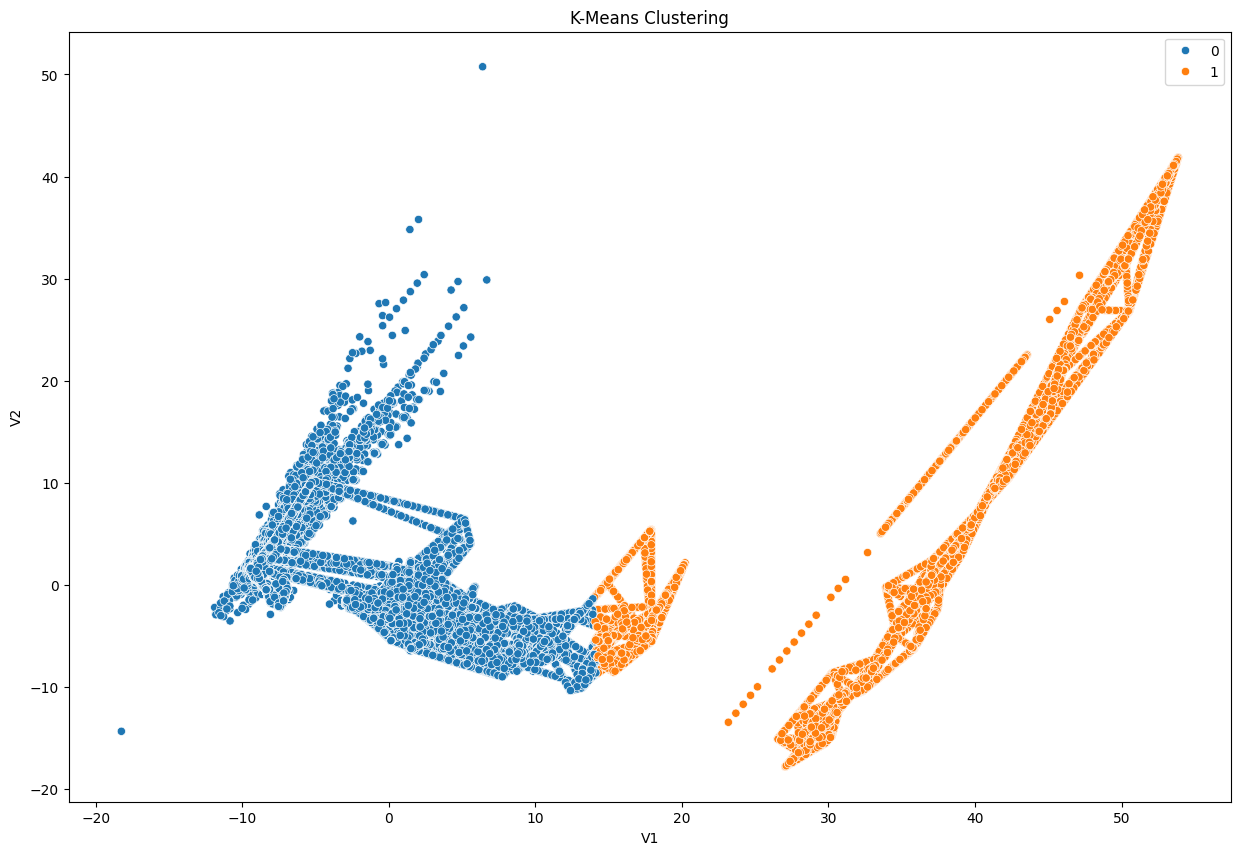

In [66]:


plt.figure(figsize=(15, 10))
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], hue=cluster_labels,)#palette="viridis")
plt.title("K-Means Clustering")
plt.xlabel("V1")
plt.ylabel("V2")
plt.show()

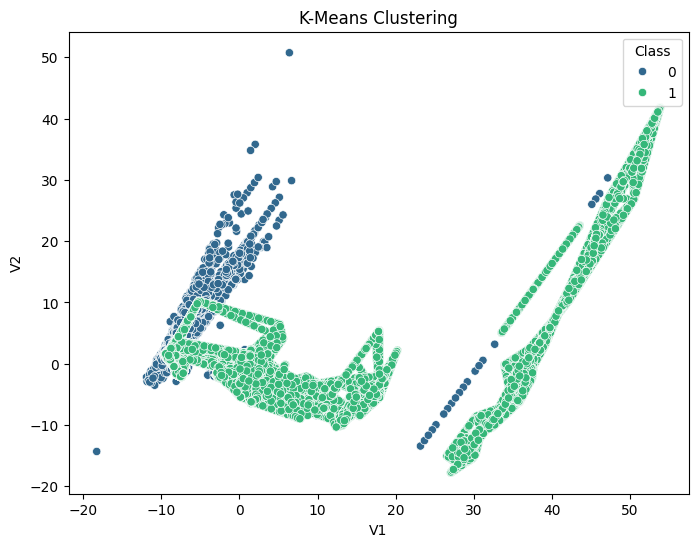

In [67]:


plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], hue=y_resampled, palette="viridis")
plt.title("K-Means Clustering")
plt.xlabel("V1")
plt.ylabel("V2")
plt.show()

In [68]:
#K-Nearest Neighbors
cluster =KNeighborsClassifier().fit(X_train, y_train)
y_pred = cluster.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"K-Nearest Neighbors Accuracy: {accuracy:.4f}")

K-Nearest Neighbors Accuracy: 0.9995


In [69]:
#Support Vector Machine
classifier=SVC(random_state=42).fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Support Vector Machine Accuracy: {accuracy:.4f}")

Support Vector Machine Accuracy: 0.9994


In [70]:
#Logistic Regression
classifier = LogisticRegression(random_state=42).fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy:.4f}")

Logistic Regression Accuracy: 0.9992


In [71]:
#Random Forest
classifier = RandomForestClassifier(random_state=42).fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Classifier Accuracy: {accuracy:.4f}")

In [ ]:
#Decision Tree Classifier
classifier = DecisionTreeClassifier().fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Classifier Accuracy: {accuracy:.4f}")

Decision Tree Classifier Accuracy: 0.9991


In [ ]:
#Gradient Boosting Classifier
train_dmatrix = xgb.DMatrix(data=X_train, label=y_train)
test_dmatrix = xgb.DMatrix(data=X_test)
params = {'objective': 'binary:logistic', 'max_depth': 3}
classifier = xgb.train(params=params, dtrain=train_dmatrix)
y_pred_proba = classifier.predict(test_dmatrix)
threshold = 0.5
y_pred = [1 if proba >= threshold else 0 for proba in y_pred_proba]
accuracy = accuracy_score(y_test, y_pred)
print(f"Gradient Boosting Classifier Accuracy: {accuracy:.4f}")

Gradient Boosting Classifier Accuracy: 0.9994


In [ ]:
#Naive Bayes Classifier
classifier = GaussianNB().fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Naive Bayes Classifier Accuracy: {accuracy:.4f}")

Naive Bayes Classifier Accuracy: 0.9779
